# k-means clustering

### Download Iris dataset
Follow the link and download the Iris dataset:  
http://archive.ics.uci.edu/ml/machine-learning-databases/iris/


In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imageio

#from sklearn.cluster import KMeans

In [2]:
class _KMeans:

    def __init__(self, n_clusters=8, init='k-means++', max_iter=300):
        self.n_clusters = n_clusters
        self.init = init
        self.max_iter = max_iter
        self.cluster_centers_ = None
        self.labels_ = None
        self.iter = None

    def _euclidean_distance(self, X1, X2):
        # squared distance -> sum x dimensions -> transpose (clusters in row)
        return np.sqrt((X1 - X2) ** 2).sum(2).T

    def _plus_plus_init(self, X):
        self.cluster_centers_ = np.array([random.choice(X)]) # assign first random centroid

        # remaining centroids
        while len(self.cluster_centers_) < self.n_clusters:
            # calculated distances (sum clusters) and probabilities (max dist -> larger prob)
            d = self._euclidean_distance(X, self.cluster_centers_[:, np.newaxis]).sum(1)
            p = d / sum(d ** 2)
            centroid = random.choices(X, p).pop() # picking the best centroid from the pool
            self.cluster_centers_ = np.append(self.cluster_centers_, [centroid], axis=0)

    def _default_init(self, X):
        self.cluster_centers_ = \
            np.array([X[i] for i in random.sample(
                range(len(X)), self.n_clusters)])

    def _run_means(self, X):
        self.iter = 0
        cluster_centers_old_ = None
        while not np.array_equal(cluster_centers_old_, self.cluster_centers_) and self.iter < self.max_iter:
            cluster_centers_old_ = self.cluster_centers_.copy()
            self.iter += 1

            # Step 1
            # d = [[np.sqrt(sum(np.power(i - c, 2))) for c in self.cluster_centers_] for i in X]
            d = self._euclidean_distance(X, self.cluster_centers_[:, np.newaxis])
            self.labels_ = np.argmin(d, axis=1) # indexes of min values (grouped by column)

            # Step 2
            cluster_centers_loc_ = []
            for c in range(self.n_clusters):
                xc = np.array([X[li] for li, lc in enumerate(self.labels_) if lc == c])
                # x_centers.append([sum(i) / len(i) for i in x.T])
                cluster_centers_loc_.append(xc.mean(0)) # calculate mean for each cluster x's

            self.cluster_centers_ = np.array(cluster_centers_loc_)

    def fit(self, X):
        X = np.array(X)

        # Step 0
        if self.init == 'k-means++':
            self._plus_plus_init(X)
        else:  # pick n random centroids
            self._default_init(X)

        # Step 1, 2
        self._run_means(X)

        return self

## Sample Demonstration

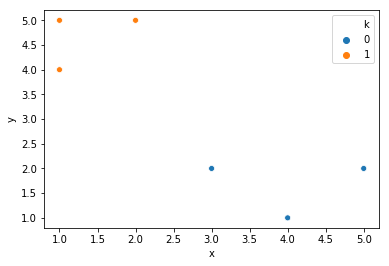

In [3]:
X = pd.DataFrame({
    'x': [1, 2, 1, 3, 5, 4],
    'y': [5, 5, 4, 2, 2, 1]
})
X['k'] = _KMeans(n_clusters=2).fit(X).labels_
sns.scatterplot(x=X['x'], y=X['y'], hue=X['k'])

## Iris Flowers

### Import

In [4]:
X = pd.read_csv('datasets/iris.data.csv')
X['k'] = _KMeans(n_clusters=3).fit(
    X[['sepal length', 'sepal width', 'petal length', 'petal width']]).labels_

### Clustering data

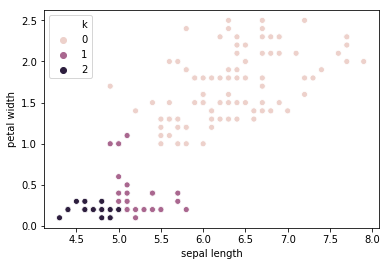

In [5]:
sns.scatterplot(x=X['sepal length'], y=X['petal width'], hue=X['k'])
# sns.pairplot(X, vars=['sepal length', 'sepal width', 'petal length', 'petal width'], hue='k')

### Actual data

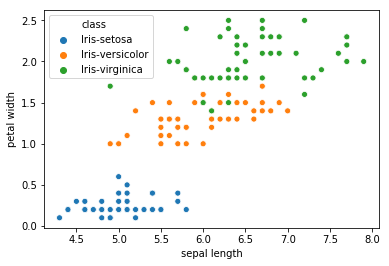

In [6]:
sns.scatterplot(x=X['sepal length'], y=X['petal width'], hue=X['class'])
# sns.pairplot(X, vars=['sepal length', 'sepal width', 'petal length', 'petal width'], hue='class')

### Accuracy check

In [7]:
k_size = X[['class', 'k']].groupby(['class', 'k']).size()
class_max = k_size.groupby(['class']).max()

print('\n')
print(k_size, end='\n\n')
print(class_max, end='\n\n')
print('Accuracy: ', str(class_max.sum()), '/', len(X), '=',
      str(round((class_max.sum() / len(X)), 2) * 100), '%')



class            k
Iris-setosa      1    25
                 2    25
Iris-versicolor  0    46
                 1     4
Iris-virginica   0    50
dtype: int64

class
Iris-setosa        25
Iris-versicolor    46
Iris-virginica     50
dtype: int64

Accuracy:  121 / 150 = 81.0 %


## Image compression

In [8]:
X = imageio.imread('datasets/image.jpg')

### k-means ++

Iterations 19


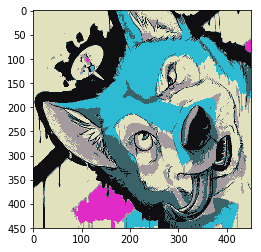

CPU times: user 12.1 s, sys: 681 ms, total: 12.8 s
Wall time: 12.7 s


In [9]:
%%time
k = _KMeans(n_clusters=6).fit(np.reshape(X, (-1, 3)))
c = list(map((lambda y: k.cluster_centers_[y].astype(int)), k.labels_))
print('Iterations', k.iter)
plt.imshow(np.reshape(c, X.shape))
plt.show()

### k-means

Iterations 21


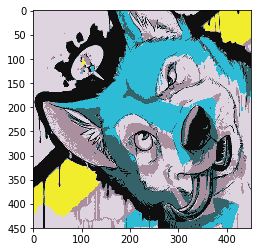

CPU times: user 12.7 s, sys: 778 ms, total: 13.5 s
Wall time: 13.2 s


In [10]:
%%time
k = _KMeans(n_clusters=6, init='default').fit(np.reshape(X, (-1, 3)))
c = list(map((lambda y: k.cluster_centers_[y].astype(int)), k.labels_))
print('Iterations', k.iter)
plt.imshow(np.reshape(c, X.shape))
plt.show()